<a href="https://colab.research.google.com/github/SarahChizzy/KPI-Analysis/blob/main/Linear_Regression_with_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
A = "/content/Procurement KPI Analysis Dataset.csv"
df = pd.read_csv(A)
print(df)

        PO_ID         Supplier  Order_Date Delivery_Date    Item_Category  \
0    PO-00001        Alpha_Inc  2023-10-17    2023-10-25  Office Supplies   
1    PO-00002  Delta_Logistics  2022-04-25    2022-05-05  Office Supplies   
2    PO-00003         Gamma_Co  2022-01-26    2022-02-15              MRO   
3    PO-00004    Beta_Supplies  2022-10-09    2022-10-28        Packaging   
4    PO-00005  Delta_Logistics  2022-09-08    2022-09-20    Raw Materials   
..        ...              ...         ...           ...              ...   
772  PO-00773  Delta_Logistics  2023-02-11    2023-02-20      Electronics   
773  PO-00774        Alpha_Inc  2022-07-23           NaN  Office Supplies   
774  PO-00775         Gamma_Co  2022-03-19    2022-04-07    Raw Materials   
775  PO-00776    Beta_Supplies  2023-08-30    2023-09-11              MRO   
776  PO-00777    Beta_Supplies  2023-12-09    2023-12-11  Office Supplies   

    Order_Status  Quantity  Unit_Price  Negotiated_Price  Defective_Units  

In [ ]:
print(df.isnull().sum())

PO_ID                 0
Supplier              0
Order_Date            0
Delivery_Date        87
Item_Category         0
Order_Status          0
Quantity              0
Unit_Price            0
Negotiated_Price      0
Defective_Units     136
Compliance            0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Defective_Units'] = imputer.fit_transform(df[['Defective_Units']])
print(df.isnull().sum())

PO_ID                0
Supplier             0
Order_Date           0
Delivery_Date       87
Item_Category        0
Order_Status         0
Quantity             0
Unit_Price           0
Negotiated_Price     0
Defective_Units      0
Compliance           0
dtype: int64


In [ ]:
df.dtypes

,0
PO_ID,object
Supplier,object
Order_Date,object
Delivery_Date,object
Item_Category,object
Order_Status,object
Quantity,int64
Unit_Price,float64
Negotiated_Price,float64
Defective_Units,float64


In [ ]:
le=LabelEncoder()
df['Supplier'] = le.fit_transform(df['Supplier'])
df['Item_Category'] = le.fit_transform(df['Item_Category'])
df['Order_Status'] = le.fit_transform(df['Order_Status'])
df['Compliance'] = le.fit_transform(df['Compliance'])

X = df[["Supplier", "Item_Category", "Order_Status", "Quantity", "Unit_Price", "Defective_Units", "Compliance"]]
y = df['Negotiated_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
LM = LinearRegression()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

In [ ]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 2.2631899230769412
Mean Squared Error: 8.180769237213958
R2 Score: 0.9885319781289819


Text(0, 0.5, 'Predicted Values')

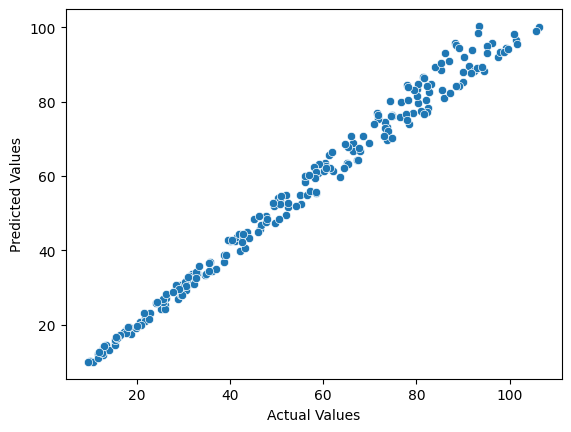

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
coefficients= LM.coef_
intercept = LM.intercept_
coefficients_df = pd.DataFrame({"Feature":X.columns, "coefficients":LM.coef_})
print("intercept:", intercept)
print(coefficients_df)
coefficients_df["Abs_coefficients"] = coefficients_df["coefficients"].abs()
coefficients_df.sort_values(by="Abs_coefficients", ascending=False, inplace=True)

intercept: 0.2653472351662316
           Feature  coefficients
0         Supplier      0.014055
1    Item_Category     -0.010027
2     Order_Status     -0.184523
3         Quantity      0.000185
4       Unit_Price      0.922714
5  Defective_Units     -0.002266
6       Compliance     -0.162033


In [ ]:
#feature importance
coefficients_df["Abs_coefficients"] = coefficients_df["coefficients"].abs()
coefficients_df.sort_values(by="Abs_coefficients", ascending=False, inplace=True)
print(coefficients_df)


           Feature  coefficients  Abs_coefficients
4       Unit_Price      0.922714          0.922714
2     Order_Status     -0.184523          0.184523
6       Compliance     -0.162033          0.162033
0         Supplier      0.014055          0.014055
1    Item_Category     -0.010027          0.010027
5  Defective_Units     -0.002266          0.002266
3         Quantity      0.000185          0.000185
